# **Sentimen Analisis Review Aplikasi DANA**

Selamat datang dalam proyek Sentimen Analisis Ulasan Pengguna Aplikasi DANA!
Di era digital saat ini, ulasan pengguna memainkan peran penting dalam membentuk persepsi masyarakat terhadap sebuah aplikasi, termasuk aplikasi dompet digital seperti DANA.

Dalam proyek ini, kita akan mendalami analisis sentimen untuk memahami bagaimana pengguna mengekspresikan pengalaman, kepuasan, maupun keluhan mereka terhadap aplikasi DANA di Google Play Store. Melalui pendekatan ini, kita dapat memperoleh gambaran umum mengenai sentimen pengguna, apakah ulasan tersebut bersifat positif, negatif, atau netral.

Analisis sentimen sendiri merupakan cabang dari pemrosesan bahasa alami (NLP) yang memungkinkan sistem untuk secara otomatis mengidentifikasi opini atau emosi dalam sebuah teks. Dengan demikian, proyek ini dapat digunakan sebagai dasar pengambilan keputusan yang lebih baik dalam pengembangan fitur, peningkatan layanan, maupun perbaikan bug di aplikasi DANA.

Selama proses ini, kita akan menerapkan berbagai tahapan, mulai dari pra-pemrosesan teks, ekstraksi fitur, hingga membangun dan menggunakan model machine learning untuk memprediksi sentimen ulasan. Bahasa pemrograman yang digunakan adalah Python, dengan dukungan dari pustaka-pustaka populer seperti NLTK, scikit-learn, dan TensorFlow.

Proyek ini tidak hanya memberikan wawasan terhadap persepsi pengguna terhadap DANA, tetapi juga memperkuat keterampilan teknis dalam bidang analisis data dan NLP.
Yuk, kita mulai perjalanan untuk mengungkap sentimen di balik ulasan pengguna aplikasi DANA!

In [3]:
!pip install --upgrade gensim==4.3.2 scipy==1.11.4

In [4]:
!pip install google-play-scraper

In [5]:
# Instal virtualenv dan buat lingkungan bersih
!pip install virtualenv
!virtualenv gensim_env
!source gensim_env/bin/activate && pip install gensim==4.3.1 scipy==1.10.1

created virtual environment CPython3.11.7.final.0-64 in 3284ms
  creator CPython3Windows(dest=C:\SERTIFIKAT\CODING CAMP 2025\submission 3\gensim_env, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=C:\Users\User\AppData\Local\pypa\virtualenv)
    added seed packages: pip==25.0.1, setuptools==78.1.0, wheel==0.45.1
  activators BashActivator,BatchActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


'source' is not recognized as an internal or external command,
operable program or batch file.


# **Import Library**

In [6]:
# Mengimpor pustaka google_play_scraper untuk mengakses ulasan dan informasi aplikasi dari Google Play Store.
from google_play_scraper import app, reviews, Sort, reviews_all

In [7]:
import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi

import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks


In [8]:
import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stop words) dalam berbagai bahasa.
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

# Scapping Dataset

Dalam proyek ini, kita akan melakukan analisis sentimen terhadap ulasan dan pendapat pengguna terkait aplikasi "DANA" di Google Play Store. Analisis ini bertujuan untuk memahami bagaimana pengguna merasakan, menilai, dan mengungkapkan pengalaman mereka saat menggunakan aplikasi dompet digital DANA.

Dengan memanfaatkan berbagai teknik pemrosesan teks serta algoritma machine learning, kita akan mengidentifikasi apakah ulasan pengguna terhadap aplikasi DANA bersifat positif, negatif, atau netral.

Hasil dari analisis sentimen ini dapat memberikan wawasan yang berharga bagi tim pengembang aplikasi untuk mengetahui aspek-aspek yang disukai maupun yang perlu ditingkatkan, sehingga dapat meningkatkan kualitas layanan dan pengalaman pengguna secara keseluruhan.

Mari kita mulai mengeksplorasi ulasan pengguna dan mengungkap sentimen yang tersembunyi di balik berbagai review terhadap aplikasi DANA

In [9]:
# Mengambil semua ulasan dari aplikasi dengan ID 'com.byu.id' di Google Play Store.
# Proses scraping mungkin memerlukan beberapa saat tergantung pada jumlah ulasan yang ada.
scrapreview = reviews_all(
    'id.dana',          # ID aplikasi
    lang='id',             # Bahasa ulasan 
    country='id',          # Negara 
    sort=Sort.MOST_RELEVANT, # Urutan ulasan 
    count=15000             # Jumlah maksimum ulasan yang ingin diambil
)

In [10]:
# Menyimpan ulasan dalam file CSV
import csv

with open('ulasan_dana.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Review'])  # Menulis header kolom
    for review in scrapreview:
        writer.writerow([review['content']])  # Menulis konten ulasan ke dalam file CSV

# Loading Dataset

In [11]:
app_reviews_df = pd.DataFrame(scrapreview)
app_reviews_df.shape
app_reviews_df.head()
app_reviews_df.to_csv('ulasan_dana.csv', index=False)

In [12]:
# Membuat DataFrame dari hasil scrapreview
app_reviews_df = pd.DataFrame(scrapreview)

# Menghitung jumlah baris dan kolom dalam DataFrame
jumlah_ulasan, jumlah_kolom = app_reviews_df.shape


In [13]:
# Menampilkan lima baris pertama dari DataFrame app_reviews_df
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,3c274eb3-4de3-41fd-85be-85fb22a55c8b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,mengapa sangat sulit mengganti KTP padahal sem...,2,369,2.77.0,2025-03-29 23:56:30,None,NaT,2.77.0
1,3b8feda9-cfe9-43fb-b6e4-00c5f60d1fa9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Emang aplikasi BUSUK.Saya transaksi sudah terj...,1,1286,2.77.0,2025-03-28 01:49:41,"Hi Kak, maaf udah bikin kamu ga tenang. Terkai...",2025-03-12 01:25:35,2.77.0
2,c1f3e4db-e86a-45b1-a66f-ae922ca02337,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Sudah beberapa tahun menjadi user dana, dan ma...",5,222,2.77.0,2025-04-11 10:24:08,None,NaT,2.77.0
3,b7e92383-8d53-489b-b08a-6e0c1d450470,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,cukup membantu.. tinggal keamanannya saja yg d...,5,260,2.77.0,2025-04-11 12:55:26,"Hi kak, kami paham apa yg kamu rasakan.Kami in...",2025-04-13 09:31:25,2.77.0
4,d0a80d29-37a0-483d-9d8b-e0fe06535ad8,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,kurangin bintang nya ga bisa di buka kalo jari...,2,74,2.77.0,2025-04-08 17:18:29,None,NaT,2.77.0


In [14]:
# Menampilkan informasi tentang DataFrame app_reviews_df
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99000 entries, 0 to 98999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              99000 non-null  object        
 1   userName              99000 non-null  object        
 2   userImage             99000 non-null  object        
 3   content               99000 non-null  object        
 4   score                 99000 non-null  int64         
 5   thumbsUpCount         99000 non-null  int64         
 6   reviewCreatedVersion  82305 non-null  object        
 7   at                    99000 non-null  datetime64[ns]
 8   replyContent          75175 non-null  object        
 9   repliedAt             75175 non-null  datetime64[ns]
 10  appVersion            82305 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 8.3+ MB


In [15]:
# Membuat DataFrame baru (clean_df) dengan menghapus baris yang memiliki nilai yang hilang (NaN) dari app_reviews_df
clean_df = app_reviews_df.dropna()

In [16]:
# Menampilkan informasi tentang DataFrame clean_df setelah membersihkan nilai yang hilang (NaN)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60484 entries, 1 to 98999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              60484 non-null  object        
 1   userName              60484 non-null  object        
 2   userImage             60484 non-null  object        
 3   content               60484 non-null  object        
 4   score                 60484 non-null  int64         
 5   thumbsUpCount         60484 non-null  int64         
 6   reviewCreatedVersion  60484 non-null  object        
 7   at                    60484 non-null  datetime64[ns]
 8   replyContent          60484 non-null  object        
 9   repliedAt             60484 non-null  datetime64[ns]
 10  appVersion            60484 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 5.5+ MB


In [17]:
# Menghapus baris duplikat dari DataFrame clean_df
clean_df = clean_df.drop_duplicates()

# Menghitung jumlah baris dan kolom dalam DataFrame clean_df setelah menghapus duplikat
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

# **Preprocessing**

Berikut adalah beberapa fungsi yang digunakan untuk membersihkan dan memproses teks. Inilah penjelasan singkat tentang masing-masing fungsi:

1. `cleaningText(text)`: Fungsi ini digunakan untuk membersihkan teks dengan beberapa langkah, seperti menghapus mention, hashtag, RT (retweet), tautan (link), angka, dan tanda baca. Selain itu, itu juga menggantikan karakter newline dengan spasi dan menghilangkan spasi ekstra di awal dan akhir teks.

2. `casefoldingText(text)`: Fungsi ini mengonversi semua karakter dalam teks menjadi huruf kecil (lowercase), sehingga teks menjadi lebih seragam.

3. `tokenizingText(text)`: Fungsi ini digunakan untuk membagi teks menjadi daftar kata atau token. Ini berguna untuk mengurai teks menjadi komponen-komponen dasar.

4. `filteringText(text)`: Fungsi ini digunakan untuk menghapus kata-kata berhenti (stopwords) dalam teks. Anda telah memperbarui daftar kata-kata berhenti dengan beberapa kata tambahan.

5. `stemmingText(text)`: Fungsi ini menerapkan stemming pada teks, yaitu mengurangi kata-kata menjadi bentuk dasarnya. Anda menggunakan pustaka Sastrawi untuk melakukan stemming dalam bahasa Indonesia.

6. `toSentence(list_words)`: Fungsi ini digunakan untuk menggabungkan daftar kata-kata menjadi sebuah kalimat.

Anda dapat menggunakan fungsi-fungsi ini dalam proyek Anda untuk membersihkan, memproses, dan mempersiapkan teks sebelum melakukan analisis sentimen. Pastikan untuk memanggil fungsi-fungsi ini dengan benar sesuai dengan tahap pemrosesan teks yang Anda inginkan.

In [18]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'[^\w\s]', '', text) # remove numbers


    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

    return stemmed_text
def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [19]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

Kamus slang atau daftar kata-kata slang yang berikan adalah kumpulan kata-kata slang bahasa Indonesia beserta terjemahan atau artinya dalam bahasa formal. Fungsi dari kamus slang seperti ini adalah:

1. **Mengartikan Slang:** Kamus slang membantu orang yang mungkin tidak familiar dengan bahasa slang atau ekspresi yang digunakan di kalangan tertentu untuk memahami makna kata-kata tersebut.

2. **Komunikasi Informal:** Slang sering digunakan dalam percakapan informal atau di media sosial. Kamus slang membantu orang untuk berkomunikasi dengan gaya yang lebih santai dan sesuai dengan konteksnya.

3. **Pemahaman Budaya Pop:** Slang sering kali terkait dengan budaya pop dan dapat mencerminkan tren dan perubahan dalam bahasa. Kamus slang memungkinkan orang untuk mengikuti dan memahami bahasa dalam konteks budaya ini.

4. **Penggunaan Sastra dan Penulisan:** Penulis atau pembicara mungkin ingin menggunakan slang dalam tulisannya untuk menciptakan efek tertentu atau mengekspresikan karakter atau setting yang lebih realistis. Kamus slang dapat membantu mereka memilih kata-kata dengan tepat.

5. **Hiburan dan Curiositas:** Beberapa orang mungkin tertarik untuk mempelajari bahasa slang hanya untuk hiburan atau karena rasa ingin tahu terhadap variasi bahasa dan ungkapan dalam bahasa sehari-hari.

Ingatlah bahwa penggunaan slang harus disesuaikan dengan konteks dan audiens. Slang cenderung lebih cocok untuk percakapan santai dengan teman-teman atau di lingkungan yang informal. Dalam situasi formal, penggunaan bahasa formal lebih sesuai.

In [20]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
1,3b8feda9-cfe9-43fb-b6e4-00c5f60d1fa9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Emang aplikasi BUSUK.Saya transaksi sudah terj...,1,1286,2.77.0,2025-03-28 01:49:41,"Hi Kak, maaf udah bikin kamu ga tenang. Terkai...",2025-03-12 01:25:35,2.77.0
3,b7e92383-8d53-489b-b08a-6e0c1d450470,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,cukup membantu.. tinggal keamanannya saja yg d...,5,260,2.77.0,2025-04-11 12:55:26,"Hi kak, kami paham apa yg kamu rasakan.Kami in...",2025-04-13 09:31:25,2.77.0
5,7353dbaa-fb95-4532-bf3e-c04982995f12,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Akun tiba"" terhubung ke UC Drive Premium, Sald...",1,238,2.77.0,2025-04-03 12:24:42,"Hi Kak, terkait saldo terpotong, pastikan akun...",2025-04-14 07:53:21,2.77.0
7,d89e6306-1a8a-44ac-9bc4-b5edcaa1be59,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,tiba2 ada potongan saldo otomatis yang ga tau ...,1,29,2.77.0,2025-04-10 20:02:30,"Hi Kak, kami paham apa yg Kakak rasakan. Terka...",2025-04-13 05:11:01,2.77.0
10,54d0d14b-4a3f-4cd3-986c-86b01db0eb01,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Koneksi gak jelas, koneksi gak stabil, gak bis...",2,384,2.74.0,2025-03-19 23:07:35,"Hi Kak, maaf udah bikin kamu ga tenang. Terkai...",2025-04-11 10:48:30,2.74.0
...,...,...,...,...,...,...,...,...,...,...,...
98992,de3afe5f-29da-4d9f-8e03-9d4773eb1e41,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ini gimana sih. Saya topup saldo dari bri ke d...,1,0,2.12.0,2022-03-30 09:10:45,"Hi Kak, maaf buat kecewa. Terkait keluhan/pert...",2022-03-30 16:43:06,2.12.0
98994,3d475d45-a3f2-4b1e-ad67-00ce771ac8a6,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Top berhasil, saldo tidak masuk.. CS dihubungi...",1,0,2.23.1,2022-10-26 01:37:11,"Hi kak, aku ngerti banget sma permasalahan kam...",2022-10-27 10:04:15,2.23.1
98996,ff9b4e6d-0925-43f6-812a-22bc89192688,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Kalo menunggu/pending pas transfer ke rekening...,2,0,1.28.0,2021-02-27 14:31:54,"Hi Kak, kamu bisa menyampaikan detail keluhan ...",2021-03-04 07:10:48,1.28.0
98998,e625d5e8-78da-4fb8-bc35-da8429fc37e3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,gajelas banvet sumpah mau masuk aja gabisa2 ma...,1,0,2.35.0,2023-06-01 19:53:25,Live Chat siap bantu Keluhan transaksi Kamu: B...,2023-06-01 19:54:43,2.35.0


In [21]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [22]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
1,3b8feda9-cfe9-43fb-b6e4-00c5f60d1fa9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Emang aplikasi BUSUK.Saya transaksi sudah terj...,1,1286,2.77.0,2025-03-28 01:49:41,"Hi Kak, maaf udah bikin kamu ga tenang. Terkai...",2025-03-12 01:25:35,2.77.0,Emang aplikasi BUSUKSaya transaksi sudah terja...,emang aplikasi busuksaya transaksi sudah terja...,emang aplikasi busuksaya transaksi sudah terja...,"[emang, aplikasi, busuksaya, transaksi, sudah,...","[emang, aplikasi, busuksaya, transaksi, berhas...",emang aplikasi busuksaya transaksi berhasil bu...
3,b7e92383-8d53-489b-b08a-6e0c1d450470,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,cukup membantu.. tinggal keamanannya saja yg d...,5,260,2.77.0,2025-04-11 12:55:26,"Hi kak, kami paham apa yg kamu rasakan.Kami in...",2025-04-13 09:31:25,2.77.0,cukup membantu tinggal keamanannya saja yg di ...,cukup membantu tinggal keamanannya saja yg di ...,cukup membantu tinggal keamanannya saja yang d...,"[cukup, membantu, tinggal, keamanannya, saja, ...","[membantu, tinggal, keamanannya, tingkatkan, p...",membantu tinggal keamanannya tingkatkan penggu...
5,7353dbaa-fb95-4532-bf3e-c04982995f12,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Akun tiba"" terhubung ke UC Drive Premium, Sald...",1,238,2.77.0,2025-04-03 12:24:42,"Hi Kak, terkait saldo terpotong, pastikan akun...",2025-04-14 07:53:21,2.77.0,Akun tiba terhubung ke UC Drive Premium Saldo ...,akun tiba terhubung ke uc drive premium saldo ...,akun tiba terhubung ke uc drive premium saldo ...,"[akun, tiba, terhubung, ke, uc, drive, premium...","[akun, terhubung, uc, drive, premium, saldo, t...",akun terhubung uc drive premium saldo terpoton...
7,d89e6306-1a8a-44ac-9bc4-b5edcaa1be59,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,tiba2 ada potongan saldo otomatis yang ga tau ...,1,29,2.77.0,2025-04-10 20:02:30,"Hi Kak, kami paham apa yg Kakak rasakan. Terka...",2025-04-13 05:11:01,2.77.0,tiba ada potongan saldo otomatis yang ga tau i...,tiba ada potongan saldo otomatis yang ga tau i...,tiba ada potongan saldo otomatis yang ga tahu ...,"[tiba, ada, potongan, saldo, otomatis, yang, g...","[potongan, saldo, otomatis, potongannya, x, sa...",potongan saldo otomatis potongannya x saldo lu...
10,54d0d14b-4a3f-4cd3-986c-86b01db0eb01,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Koneksi gak jelas, koneksi gak stabil, gak bis...",2,384,2.74.0,2025-03-19 23:07:35,"Hi Kak, maaf udah bikin kamu ga tenang. Terkai...",2025-04-11 10:48:30,2.74.0,Koneksi gak jelas koneksi gak stabil gak bisa ...,koneksi gak jelas koneksi gak stabil gak bisa ...,koneksi gak jelas koneksi gak stabil gak bisa ...,"[koneksi, gak, jelas, koneksi, gak, stabil, ga...","[koneksi, koneksi, stabil, pakai, data, wifi, ...",koneksi koneksi stabil pakai data wifi pakai d...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98992,de3afe5f-29da-4d9f-8e03-9d4773eb1e41,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ini gimana sih. Saya topup saldo dari bri ke d...,1,0,2.12.0,2022-03-30 09:10:45,"Hi Kak, maaf buat kecewa. Terkait keluhan/pert...",2022-03-30 16:43:06,2.12.0,Ini gimana sih Saya topup saldo dari bri ke da...,ini gimana sih saya topup saldo dari bri ke da...,ini bagaimana sih saya topup saldo dari bri ke...,"[ini, bagaimana, sih, saya, topup, saldo, dari...","[topup, saldo, bri, dana, kom, masuk, suksess,...",topup saldo bri dana kom masuk suksess saldo b...
98994,3d475d45-a3f2-4b1e-ad67-00ce771ac8a6,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Top berhasil, saldo tidak masuk.. CS dihubungi...",1,0,2.23.1,2022-10-26 01:37:11,"Hi kak, aku ngerti banget sma permasalahan kam...",2022-10-27 10:04:15,2.23.1,Top berhasil sa

# Pelabelan dan Ekstrasi Fitur

In [ ]:
import csv
import requests
from io import StringIO

# Mengambil kamus Positif dari GitHub
lexicon_positive = dict()
url_positive = 'https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv'

response = requests.get(url_positive)
if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])
else:
    print( "Gagal mengambil kamus positif")

# Mengambil kamus Negatif dari GitHub
lexicon_negative = dict()
url_negative = 'https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv'

response = requests.get(url_negative)
if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
else:
    print("Gagal mengambil kamus negatif")

# Mengambil kamus Netral dari GitHub
lexicon_neutral = dict()
url_neutral = 'https://raw.githubusercontent.com/chyraa/Kamus-Analisis-Data-/main/lexicon_neutral.csv'

response = requests.get(url_neutral)
if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    next(reader)  # <-- Skip header
    for i, row in enumerate(reader, start=2):  # Mulai hitung dari baris 2 (karena header baris 1)
        if len(row) < 2:
            print(f" Baris {i} kosong/tidak lengkap: {row}")
            continue
        try:
            lexicon_neutral[row[0]] = int(row[1])
        except ValueError:
            print(f" Gagal convert ke int di baris {i}: {row[1]}")
else:
    print(" Gagal mengambil kamus netral")

print("Contoh kata positif:", list(lexicon_positive.items())[:5])
print("Contoh kata negatif:", list(lexicon_negative.items())[:5])
print("Contoh kata netral :", list(lexicon_neutral.items())[:5])


Contoh kata positif: [('hai', 3), ('merekam', 2), ('ekstensif', 3), ('paripurna', 1), ('detail', 2)]
Contoh kata negatif: [('putus tali gantung', -2), ('gelebah', -2), ('gobar hati', -2), ('tersentuh (perasaan)', -1), ('isak', -5)]
Contoh kata netral : [('saya', 6428), ('dana', 5816), ('di', 5724), ('bisa', 4640), ('nya', 3013)]


In [24]:
def sentiment_analysis_lexicon_indonesia(words):
    score = 0

    for word in words:
        if word in lexicon_positive:
            score += lexicon_positive[word]
        elif word in lexicon_negative:
            score += lexicon_negative[word]
        elif word in lexicon_neutral:
            score += lexicon_neutral[word]  # bisa 0 atau nilai netral

    if score > 0:
        polarity = 'positive'
    elif score < 0:
        polarity = 'negative'
    else:
        polarity = 'neutral'

    return score, polarity


In [25]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]

print(clean_df['polarity'].value_counts())  # Cek distribusi label


polarity
positive    51135
negative     7981
neutral      1368
Name: count, dtype: int64


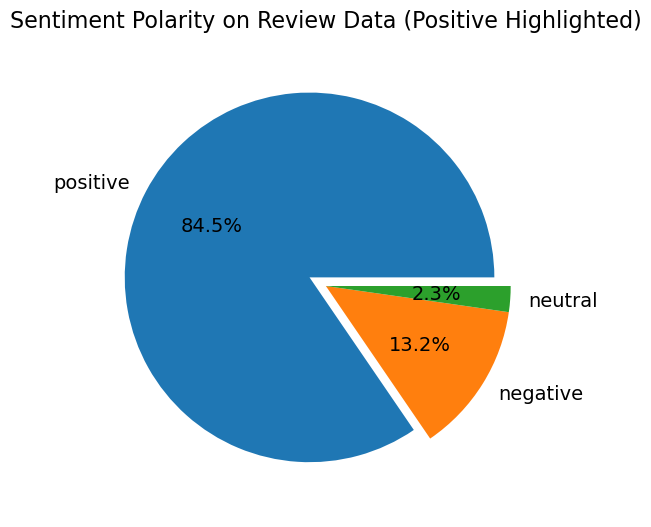

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))

# Ambil distribusi data
sizes = [count for count in clean_df['polarity'].value_counts()]
labels = list(clean_df['polarity'].value_counts().index)

# Buat explode yang hanya menonjolkan bagian 'positive'
explode = [0.1 if label == 'positive' else 0 for label in labels]

# Pie chart
ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity on Review Data (Positive Highlighted)', fontsize=16, pad=20)

plt.show()


In [27]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'positive_tweets' yang hanya berisi tweet dengan polaritas positif.
positive_tweets = clean_df[clean_df['polarity'] == 'positive']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'positive_tweets'.
positive_tweets = positive_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'positive_tweets' berdasarkan 'polarity_score' secara menurun.
positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
positive_tweets = positive_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
positive_tweets.index += 1

In [28]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'negative_tweets' yang hanya berisi tweet dengan polaritas negatif.
negative_tweets = clean_df[clean_df['polarity'] == 'negative']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'negative_tweets'.
negative_tweets = negative_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'negative_tweets' berdasarkan 'polarity_score' secara menaik (ascending).
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=True)

# Memilih 10 baris pertama dari DataFrame yang sudah diurutkan.
negative_tweets = negative_tweets[0:10]

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
negative_tweets = negative_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
negative_tweets.index += 1

In [29]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'negative_tweets' yang hanya berisi tweet dengan polaritas negatif.
neutral_tweets = clean_df[clean_df['polarity'] == 'neutral']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'negative_tweets'.
neutral_tweets = neutral_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'negative_tweets' berdasarkan 'polarity_score' secara menaik (ascending).
neutral_tweets = neutral_tweets.sort_values(by='polarity_score', ascending=True)

# Memilih 10 baris pertama dari DataFrame yang sudah diurutkan.
neutral_tweets = neutral_tweets[0:10]

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
neutral_tweets = neutral_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
neutral_tweets.index += 1

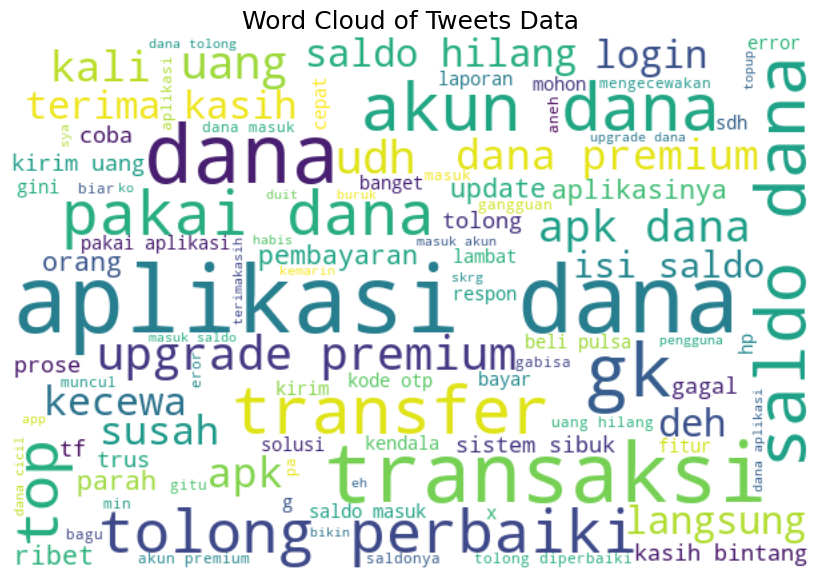

In [30]:
# Visualisasi wordcloud
list_words = ' '.join([' '.join(tweet) for tweet in clean_df['text_stopword']])

# Buat dan tampilkan WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Tweets Data', fontsize=18)
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')
plt.tight_layout(pad=0)
plt.show()


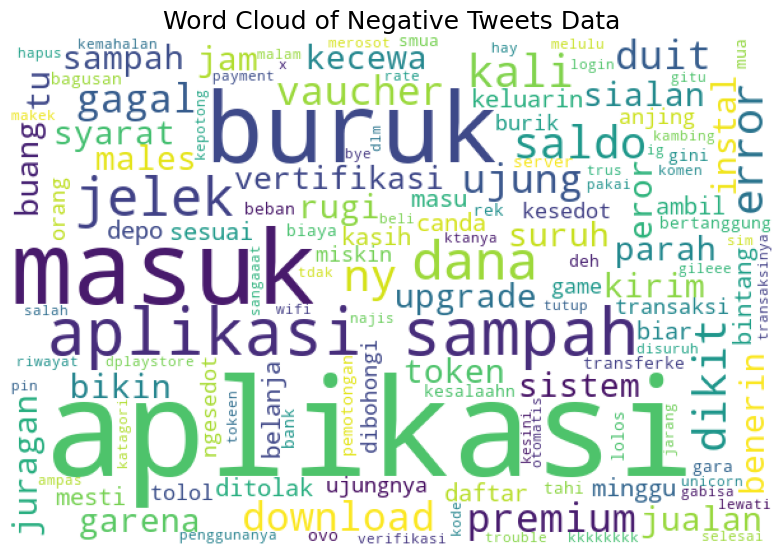

In [31]:
# Visualisasi WordCloud Negatif
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'negative_tweets'.
for tweet in negative_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Negative Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

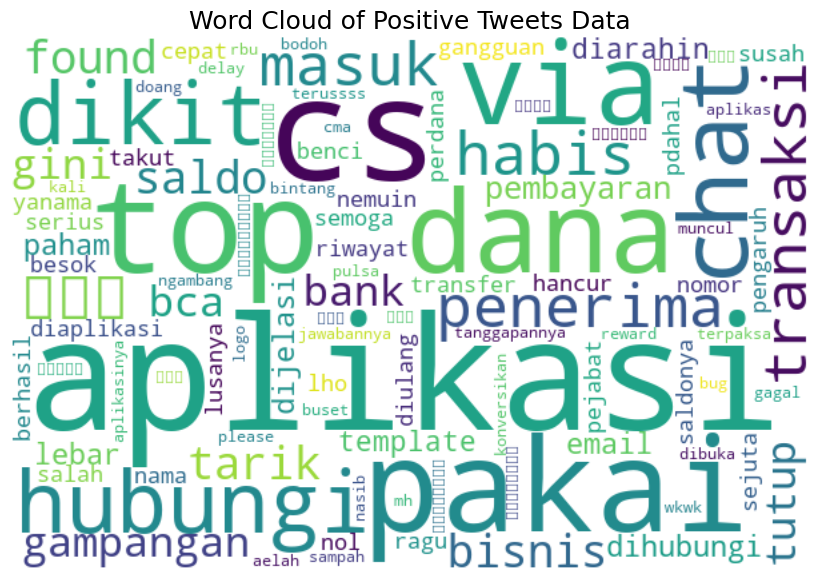

In [32]:
# Visualisasi WordCloud Positif
from wordcloud import WordCloud
import matplotlib.pyplot as plt

list_words = ' '.join([' '.join(tweet) for tweet in neutral_tweets['text_stopword']])

wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Positive Tweets Data', fontsize=18)
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')
plt.tight_layout(pad=0)
plt.show()


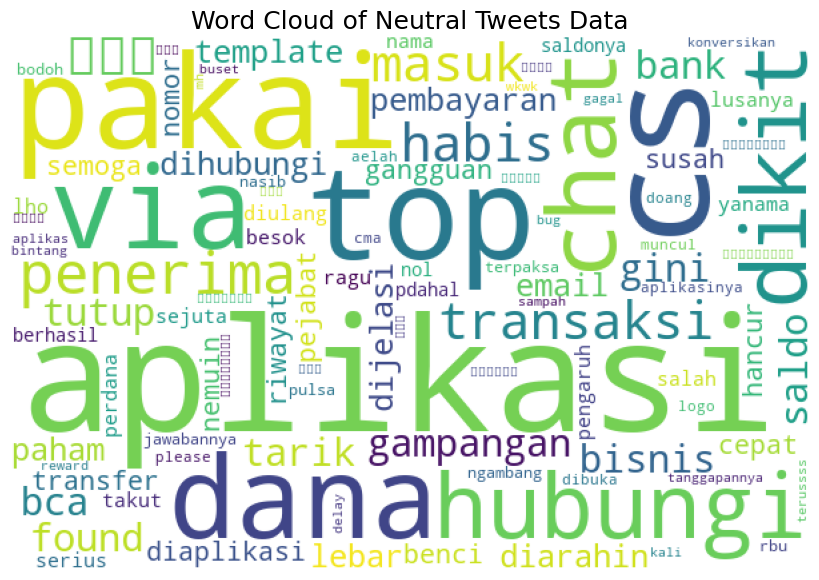

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Gabungkan semua kata dari tweet netral jadi satu string
list_words = ' '.join([' '.join(tweet) for tweet in neutral_tweets['text_stopword']])

# Membuat objek WordCloud
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Menampilkan word cloud
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Neutral Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow(wordcloud)
ax.axis('off')
fig.tight_layout(pad=0)
plt.show()


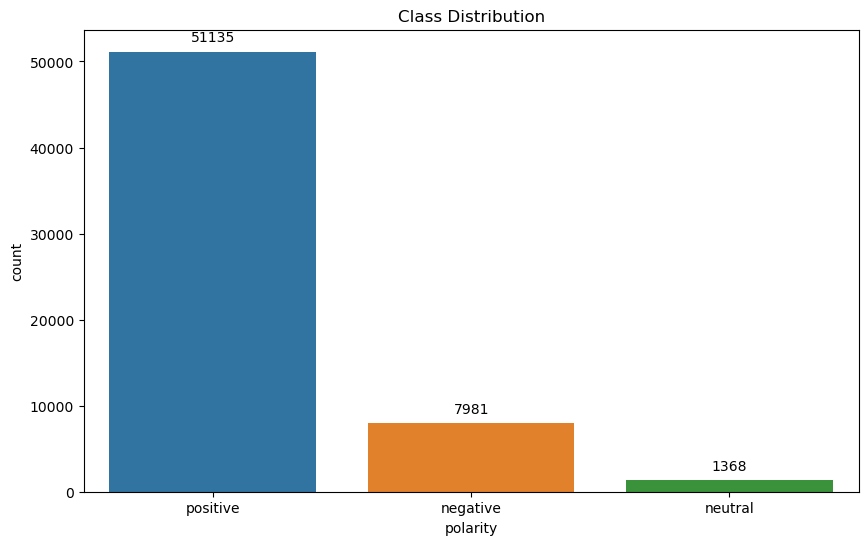

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


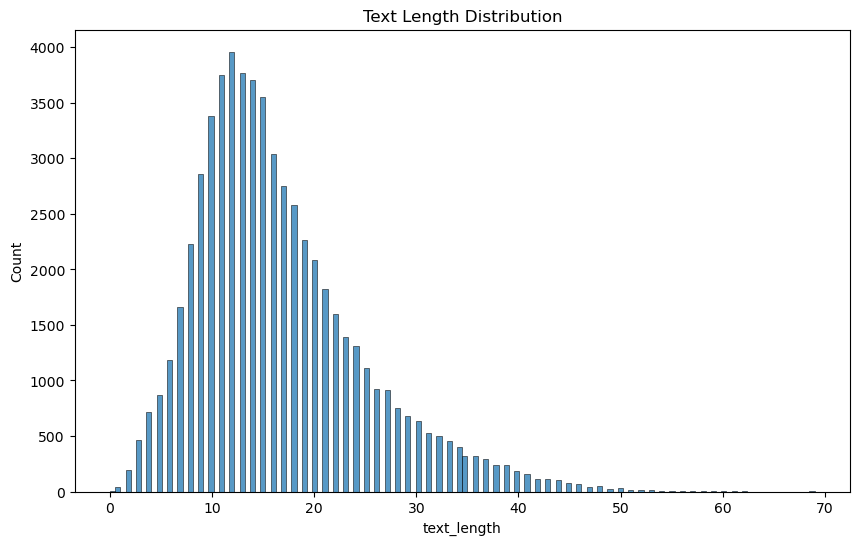

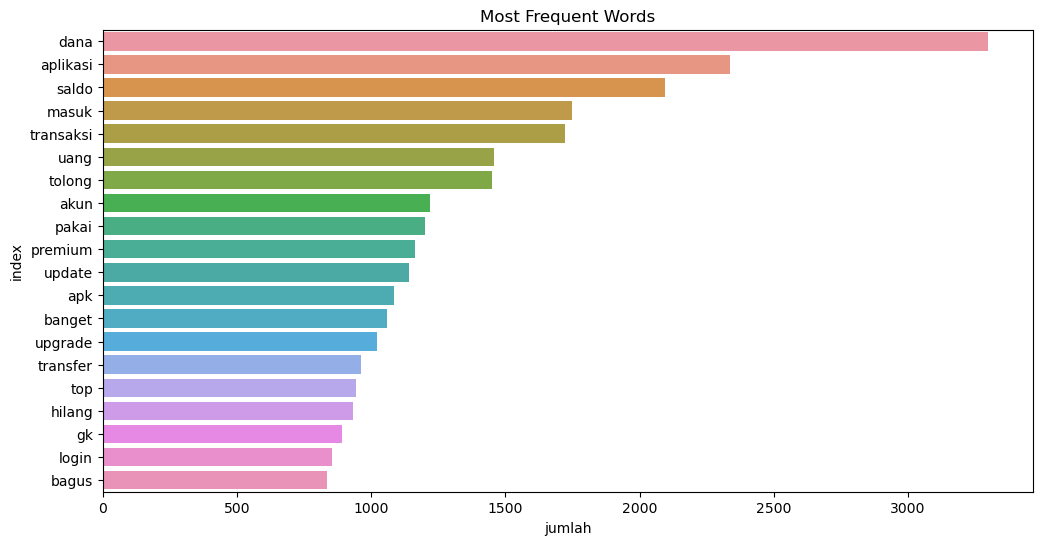

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Set the figure size
plt.figure(figsize=(10, 6))

# Check class distribution
class_dist_plot = sns.countplot(x='polarity', data=clean_df)
plt.title('Class Distribution')

# Add counts above the bars on the plot
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')

plt.show()

# Set the figure size
plt.figure(figsize=(10, 6))

# Visualize text length distribution
clean_df['text_length'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(clean_df['text_length'])
plt.title('Text Length Distribution')
plt.show()

# Set the figure size
plt.figure(figsize=(12, 6))

# Visualize most frequent words
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Most Frequent Words')
plt.show()

In [35]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score

## **Data Splitting**

In [36]:
clean_df.head(2)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,polarity_score,polarity,text_length
1,3b8feda9-cfe9-43fb-b6e4-00c5f60d1fa9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Emang aplikasi BUSUK.Saya transaksi sudah terjadi dan berhasil dan ada bukti transaksi berhasil. Tapi saldo gak masuk,Alias uang saya ilang begitu aja.. Emang gak bnyak sih.. Cuma kecewa aja.Udah 3 kali ini lho. Clear chace sudah,update udah,jaringan stabil.Tetep aja uang hilang.. Baru ini transaksi terjadi tapi uang tidak terisi. Hati hati buat pengguna DANA. Menghubungi DIANA dan email juga gak ada respon. Jangan di download deh. Rugi..!!",1,1286,2.77.0,2025-03-28 01:49:41,"Hi Kak, maaf udah bikin kamu ga tenang. Terkait keluhan saldo yg belum diterima agar kami bantu lebih lanjut, Kakak dapat menghubungi DIANA pd menu ""Me/Saya"" ya Kak. Kami pasti akan bantu keluhan kamu sebaik mungkin. Thanks -NA-",2025-03-12 01:25:35,2.77.0,Emang aplikasi BUSUKSaya transaksi sudah terjadi dan berhasil dan ada bukti transaksi berhasil Tapi saldo gak masukAlias uang saya ilang begitu aja Emang gak bnyak sih Cuma kecewa ajaUdah kali ini lho Clear chace sudahupdate udahjaringan stabilTetep aja uang hilang Baru ini transaksi terjadi tapi uang tidak terisi Hati hati buat pengguna DANA Menghubungi DIANA dan email juga gak ada respon Jangan di download deh Rugi,emang aplikasi busuksaya transaksi sudah terjadi dan berhasil dan ada bukti transaksi berhasil tapi saldo gak masukalias uang saya ilang begitu aja emang gak bnyak sih cuma kecewa ajaudah kali ini lho clear chace sudahupdate udahjaringan stabiltetep aja uang hilang baru ini transaksi terjadi tapi uang tidak terisi hati hati buat pengguna dana menghubungi diana dan email juga gak ada respon jangan di download deh rugi,emang aplikasi busuksaya transaksi sudah terjadi dan berhasil dan ada bukti transaksi berhasil tapi saldo gak masukalias uang saya hilang begitu saja emang gak bnyak sih cuma kecewa ajaudah kali ini lho clear chace sudahupdate udahjaringan stabiltetep saja uang hilang baru ini transaksi terjadi tapi uang tidak terisi hati hati buat pengguna dana menghubungi diana dan email juga gak ada respon jangan di download deh rugi,"[emang, aplikasi, busuksaya, transaksi, sudah, terjadi, dan, berhasil, dan, ada, bukti, transaksi, berhasil, tapi, saldo, gak, masukalias, uang, saya, hilang, begitu, saja, emang, gak, bnyak, sih, cuma, kecewa, ajaudah, kali, ini, lho, clear, chace, sudahupdate, udahjaringan, stabiltetep, saja, uang, hilang, baru, ini, transaksi, terjadi, tapi, uang, tidak, terisi, hati, hati, buat, pengguna, dana, menghubungi, diana, dan, email, juga, gak, ada, respon, jangan, di, download, deh, rugi]","[emang, aplikasi, busuksaya, transaksi, berhasil, bukti, transaksi, berhasil, saldo, masukalias, uang, hilang, emang, bnyak, kecewa, ajaudah, kali, lho, clear, chace, sudahupdate, udahjaringan, stabiltetep, uang, hilang, transaksi, uang, terisi, hati, hati, pengguna, dana, menghubungi, diana, email, respon, download, deh, rugi]",emang aplikasi busuksaya transaksi berhasil bukti transaksi berhasil saldo masukalias uang hilang emang bnyak kecewa ajaudah kali lho clear chace sudahupdate udahjaringan stabiltetep uang hilang transaksi uang terisi hati hati pengguna dana menghubungi diana email respon download deh rugi,2762,positive,39
3,b7e92383-8d53-489b-b08a-6e0c1d450470,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,cukup membantu.. tinggal keamanannya saja yg di tingkatkan.. bukan kepada kita pengguna yg harus tambah pin Password DLL.. karna percuma kalo kita tambah pin Password DLL tapi kenyataannya ga ada hujan ga ada angin tiba² saldo kita berkurang dengan sendirinya.. lal

In [37]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = clean_df['text_akhir']
y = clean_df['polarity']

In [38]:
# Skema 1: SVM + TF-IDF + Split 80/20
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Ekstraksi fitur
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8)
X_tfidf = tfidf.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Training model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Evaluasi
y_pred = svm_model.predict(X_test)
print("Akurasi SVM + TF-IDF:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Akurasi SVM + TF-IDF: 0.9217987930891957


c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    negative       0.81      0.72      0.76      1639
     neutral       0.00      0.00      0.00       260
    positive       0.94      0.98      0.96     10198

    accuracy                           0.92     12097
   macro avg       0.58      0.57      0.57     12097
weighted avg       0.90      0.92      0.91     12097



c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Skema 2: Logistic Regression + TF-DF
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# TF-IDF dengan tuning parameter
tfidf = TfidfVectorizer(
    max_features=7000,       
    ngram_range=(1, 2),         
    min_df=3,                  
    max_df=0.9,                
    sublinear_tf=True          
)
X_tfidf = tfidf.fit_transform(X)

# Split 70/30
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

# Logistic Regression dengan regularisasi L2
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Evaluasi
y_pred = lr_model.predict(X_test)
print("Akurasi Logistic Regression + TF-IDF:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Akurasi Logistic Regression + TF-IDF: 0.9313898379808222
              precision    recall  f1-score   support

    negative       0.90      0.71      0.79      2429
     neutral       1.00      0.00      0.01       406
    positive       0.94      0.99      0.96     15311

    accuracy                           0.93     18146
   macro avg       0.94      0.57      0.59     18146
weighted avg       0.93      0.93      0.92     18146



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import numpy as np
from gensim.models import Word2Vec

# TOKENISASI 
X_tokenized = [text.split() for text in X]  # X: list of strings

# TRAIN WORD2VEC 
model_w2v = Word2Vec(
    sentences=X_tokenized,
    vector_size=3000,
    window=5,
    min_count=2,
    workers=4,
    sg=1  # Skip-gram
)

# KALIMAT JADI RATA2 VEKTOR 
def get_avg_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

X_w2v = np.array([get_avg_vector(tokens, model_w2v) for tokens in X_tokenized])

# SPLIT DATA 80/20
X_train, X_test, y_train, y_test = train_test_split(X_w2v, y, test_size=0.2, random_state=42)

# LOGISTIC REGRESSION
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("\n=== Logistic Regression + Word2Vec ===")
print("Akurasi:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# =SVM
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("\n=== SVM (LinearSVC) + Word2Vec ===")
print("Akurasi:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))



=== Logistic Regression + Word2Vec ===
Akurasi: 0.8857567992064148
              precision    recall  f1-score   support

    negative       0.73      0.45      0.55      1639
     neutral       1.00      0.05      0.09       260
    positive       0.90      0.98      0.94     10198

    accuracy                           0.89     12097
   macro avg       0.88      0.49      0.53     12097
weighted avg       0.88      0.89      0.87     12097


=== SVM (LinearSVC) + Word2Vec ===
Akurasi: 0.8930313300818384
              precision    recall  f1-score   support

    negative       0.76      0.49      0.59      1639
     neutral       1.00      0.01      0.02       260
    positive       0.91      0.98      0.94     10198

    accuracy                           0.89     12097
   macro avg       0.89      0.49      0.52     12097
weighted avg       0.89      0.89      0.87     12097



In [41]:
# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

,aamiin,abaikan,abal,abang,accord,account,adain,adakan,adik,adil,...,yahh,yak,yh,yng,youtube,youtube lancar,yt,yth,yuk,zaman
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.175893,0.212549,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
60480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
60481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
60482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


In [42]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

## **Pemodelan Naive Bayes**

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

# Membuat objek model Naive Bayes (Bernoulli)
naive_bayes = BernoulliNB()

# Melatih model Naive Bayes pada data pelatihan 
naive_bayes.fit(X_train, y_train)

# Prediksi pada data pelatihan dan data uji
y_pred_train_nb = naive_bayes.predict(X_train)
y_pred_test_nb = naive_bayes.predict(X_test)

# Evaluasi akurasi model Naive Bayes
accuracy_train_nb = accuracy_score(y_pred_train_nb, y_train)
accuracy_test_nb = accuracy_score(y_pred_test_nb, y_test)

# Menampilkan akurasi
print('Naive Bayes - accuracy_train:', accuracy_train_nb)
print('Naive Bayes - accuracy_test:', accuracy_test_nb)


Naive Bayes - accuracy_train: 0.9100378200756402
Naive Bayes - accuracy_test: 0.8910473671158139


## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Membuat objek model Random Forest dengan paralel
random_forest = RandomForestClassifier(
    n_estimators=100,
    n_jobs=-1,                
    random_state=42
)

random_forest.fit(X_train, y_train)

# Prediksi langsung 
y_pred_train_rf = random_forest.predict(X_train)
y_pred_test_rf = random_forest.predict(X_test)

# Evaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)


Random Forest - accuracy_train: 0.9999379998759997
Random Forest - accuracy_test: 0.8850128130941556


## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Membuat objek model Logistic Regression dengan tuning 
logistic_regression = LogisticRegression(
    C=3.0,                     
    max_iter=1500,             
    solver='liblinear',       
    random_state=42
)

# Melatih model Logistic Regression 
logistic_regression.fit(X_train, y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = logistic_regression.predict(X_train)
y_pred_test_lr = logistic_regression.predict(X_test)

# Evaluasi akurasi model Logistic Regression
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

# Menampilkan akurasi
print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)


Logistic Regression - accuracy_train: 0.9613739227478455
Logistic Regression - accuracy_test: 0.9397371249070018


## **Decision Tree**

In [46]:
from sklearn.tree import DecisionTreeClassifier

# Membuat objek model Decision Tree
decision_tree = DecisionTreeClassifier()

# Melatih model Decision Tree pada data pelatihan
decision_tree.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_dt = decision_tree.predict(X_train.toarray())
y_pred_test_dt = decision_tree.predict(X_test.toarray())

# Evaluasi akurasi model Decision Tree
accuracy_train_dt = accuracy_score(y_pred_train_dt, y_train)
accuracy_test_dt = accuracy_score(y_pred_test_dt, y_test)

# Menampilkan akurasi
print('Decision Tree - accuracy_train:', accuracy_train_dt)
print('Decision Tree - accuracy_test:', accuracy_test_dt)

Decision Tree - accuracy_train: 0.9999379998759997
Decision Tree - accuracy_test: 0.8612879226254443


In [47]:
import pandas as pd

# Membuat DataFrame untuk hasil akurasi
results_df = pd.DataFrame({
    'Model': ['Naive Bayes', 'Random Forest', 'Logistic Regression', 'Decision Tree'],
    'Accuracy Train': [accuracy_train_nb, accuracy_train_rf, accuracy_train_lr, accuracy_train_dt],
    'Accuracy Test': [accuracy_test_nb, accuracy_test_rf, accuracy_test_lr, accuracy_test_dt]
})
# Menampilkan hanya kolom "Accuracy Test"
accuracy_test_only = results_df[['Model', 'Accuracy Test']]
print(accuracy_test_only)

                 Model  Accuracy Test
0          Naive Bayes       0.891047
1        Random Forest       0.885013
2  Logistic Regression       0.939737
3        Decision Tree       0.861288


In [48]:
# Mengurutkan DataFrame berdasarkan kolom "Accuracy Test" dari tertinggi ke terendah
accuracy_test_sorted = accuracy_test_only.sort_values(by='Accuracy Test', ascending=False)

# Menampilkan DataFrame yang telah diurutkan
print(accuracy_test_sorted)


                 Model  Accuracy Test
2  Logistic Regression       0.939737
0          Naive Bayes       0.891047
1        Random Forest       0.885013
3        Decision Tree       0.861288


Dalam kasus Sentiment Analysis ini, algoritma Logistic Regression mencapai akurasi tertinggi sebesar 91%. Oleh karena itu, algoritma Logistic Regression dipilih sebagai model utama yang akan digunakan untuk memprediksi sentimen pada kalimat-kalimat baru.

In [ ]:
# Input kalimat baru dari pengguna
kalimat_baru = input("Masukkan kalimat baru: ")

# Melakukan preprocessing pada kalimat baru
kalimat_baru_cleaned = cleaningText(kalimat_baru)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final = toSentence(kalimat_baru_filtered)

# Menggunakan objek tfidf yang sudah di-fit dari pelatihan sebelumnya
X_kalimat_baru = tfidf.transform([kalimat_baru_final])

# Memperoleh prediksi sentimen kalimat baru
prediksi_sentimen = logistic_regression.predict(X_kalimat_baru)

# Menampilkan hasil prediksi
if prediksi_sentimen[0] == 'positive':
    print("Sentimen kalimat baru adalah POSITIF.")
elif prediksi_sentimen[0] == 'negative':
    print("Sentimen kalimat baru adalah NEGATIF.")
else:
    print("Sentimen kalimat baru adalah NETRAL.")
